In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from loaders import load_features, load_categories

np.random.seed(42)

In [2]:
columns = ['category_id', 'description__ant',
 'description__avail',
 'description__deal',
 'description__follow',
 'description__game',
 'description__imag',
 'description__key',
 'description__life',
 'description__music',
 'description__new',
 'description__news',
 'description__nhttp',
 'description__noggin',
 'description__show',
 'description__tag',
 'description__time',
 'description__watch',
 'description__world',
 'description__youtub',
 'description_num_chars',
 'description_num_exclamation_marks',
 'description_num_numbers',
 'description_num_periods',
 'description_num_question_marks',
 'description_num_words',
 'description_sentiment',
 'faces_fear',
 'faces_happy',
 'faces_surprise',
 'faces_total',
 'has_image',
 'l1',
 'like_ratio',
 'publish_hour',
 'publish_weekday',
 's2',
 'tag__animation',
 'tag__basketball',
 'tag__beauty',
 'tag__blocko life noggin',
 'tag__comedy',
 'tag__education',
 'tag__educational',
 'tag__fashion',
 'tag__food',
 'tag__funny',
 'tag__highlights',
 'tag__how to',
 'tag__humor',
 'tag__movie',
 'tag__music',
 'tag__nba',
 'tag__pop',
 'tag__rap',
 'tag__science',
 'tag__talk show',
 'tag__tech',
 'tag__technology',
 'tag__trailer',
 'tag__tutorial',
 'title__1',
 'title__2017',
 'title__2018',
 'title__christma',
 'title__day',
 'title__de',
 'title__first',
 'title__hd',
 'title__iphon',
 'title__made',
 'title__new',
 'title__offici',
 'title__play',
 'title__shoot',
 'title__tech',
 'title__trailer',
 'title__video',
 'title__world',
 'title_num_exclamation_marks',
 'title_num_numbers',
 'title_num_periods',
 'title_num_question_marks',
 'title_num_uppercase_words']
# columns = ['category_id', 'title_num_uppercase_words',
#  'description_num_question_marks',
#  'description__youtub',
#  'description__tag',
#  'description__time',
#  'description__ant',
#  'description__life',
#  'description__show',
#  'description__watch',
#  'tag__tutorial',
#  'tag__beauty',
#  'tag__science',
#  'tag__how to',
#  'description_num_chars']
# features = load_features().drop(columns=['video_id'])
features = load_features()[columns]
features

KeyError: "['title__iphon', 'title__world', 'description__ant', 'title__1', 'description__world', 'description__imag', 'description__key', 'description__watch', 'title__made', 'title__play', 'description__game', 'description__noggin', 'description__nhttp', 'title__de', 'description__tag', 'tag__blocko life noggin', 'title__christma', 'description__life', 'description__time', 'description__avail', 'description__deal'] not in index"

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

categories = load_categories()
# ctg_count = max(map(int, categories.keys())) + 1
# categories_list = [categories.get(str(key)) for key in range(ctg_count)]

known_categories = ~features['category_id'].isna()
df = features[known_categories]
x = df.drop(columns=['category_id']).fillna(0)
y = df['category_id'].apply(lambda ctg_id: categories[str(int(ctg_id))])

x = scaler.fit_transform(x)

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(1, 17, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    score = knn.score(x_test, y_test)
    print(k, score)

1 0.36363636363636365
3 0.3939393939393939
5 0.40404040404040403
7 0.3434343434343434
9 0.35353535353535354
11 0.31313131313131315
13 0.3333333333333333
15 0.3434343434343434


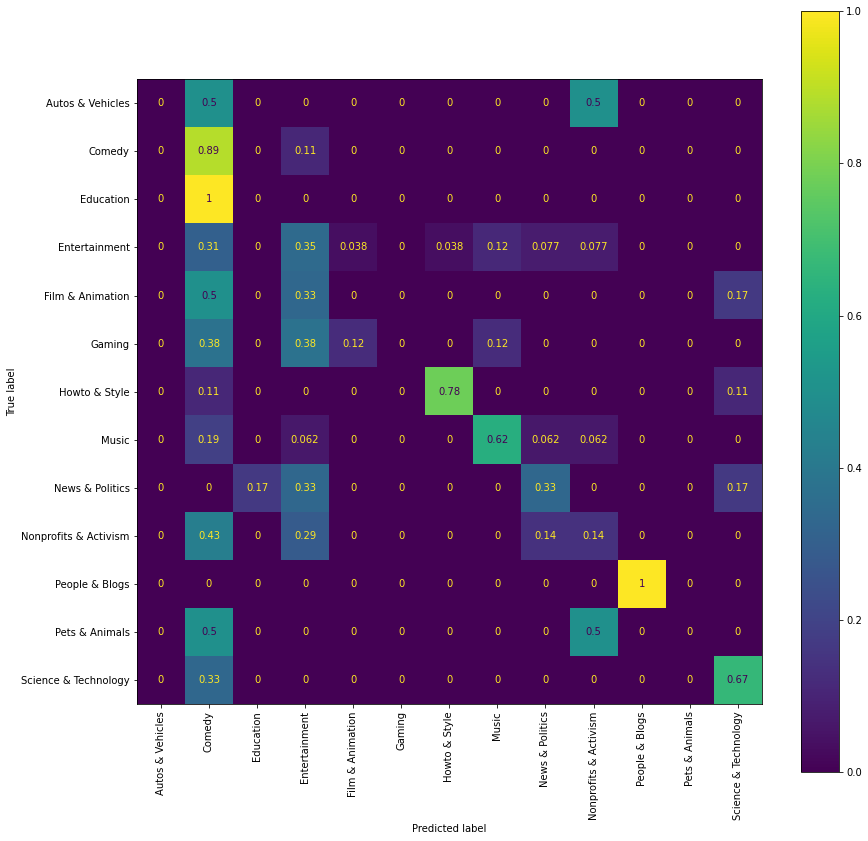

In [6]:
from sklearn.metrics import plot_confusion_matrix

def get_classifier():
    return KNeighborsClassifier(n_neighbors=5)

model = get_classifier()
model.fit(x_train, y_train)
plt.figure(figsize=(14, 14))
plot_confusion_matrix(model, x_test, y_test, xticks_rotation=90, normalize='true', ax=plt.axes())

In [7]:
k = 5
cv = np.random.randint(k, size=len(df))

scores = np.zeros(k)

for i in range(k):
    train_idx = cv != i
    test_idx = cv == i
    cv_x_train = x[train_idx]
    cv_x_test = x[test_idx]
    cv_y_train = y[train_idx]
    cv_y_test = y[test_idx]
    
    model = get_classifier()
    model.fit(cv_x_train, cv_y_train)
    score = model.score(cv_x_test, cv_y_test)
    scores[i] = score
    print(score)
print('mean', scores.mean())

0.2911392405063291
0.3974358974358974
0.38461538461538464
0.32051282051282054
0.3368421052631579
mean 0.3461090896667179


In [8]:
features['category_id'].dropna()

76      24.0
181     24.0
195     22.0
196      1.0
199     24.0
        ... 
8563    24.0
8570    24.0
8578    10.0
8582    24.0
8592    20.0
Name: category_id, Length: 395, dtype: category
Categories (15, float64): [1.0, 2.0, 10.0, 15.0, ..., 26.0, 27.0, 28.0, 29.0]